<a href="https://colab.research.google.com/github/mkirby1995/Data-Storytelling-Project/blob/master/Initial_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Congressional Spending: From Nixon to Trump

**Pecan Method**

- P-What is the problem you are solving?
- C-What is the cause of the problem?
- A-What is your answer to this problem?
- N-What are the net benefits of solving this problem?

**Problem**

We are bombarded with partisian information everyday reguarding how we should be taxed and how that money should be spent. This bombardment can make viewing the facts and forming an independant opinion quite dificult for many people.

**Cause**

It is difficult for people to devlop informed opinions for many reasons. Congressional revenue and income data is burried in a goverment website somewhere in the hellpit that is the internet. In addition to the obscurity of the base data there are clear and present political motives for news media and politicians to make their presentation of this data as polarizing as possible. 

**Answer**

A non-partisian presentation of the relavent data could help people develop a more informed opinion when It comes to exciting things like tax policy.

**Net Benifits**



---



# First, lets get familiar with the domain were working with.

**Congressional Revenue**

The United States Congres has the power to '"lay and collect Taxes, Duties, Imposts and Excises, to pay the Debts and provide for the common Defence and general Welfare of the United States" as enumerated in Article 1 Section 8 Clause 1 of the US Constitution.

The 16th Ammendment in 1913 extended congressional power of taxation to include income taxes without apportionment among the several States

The Constitution also grants Congress the exclusive power to appropriate funds, and this power of the purse is one of Congress's primary checks on the executive branch.

**Income Tax**

Not going to say much about income tax im sure were all very familiar with it. Capital gains tax is included in here



---



**Mandatory Spending**

mandatory spending is government spending on certain programs that are mandated by law

Congress legislates spending for mandatory programs outside of the annual appropriations bill process. Congress can only reduce the funding for programs by changing the authorization law itself. This requires a 60-vote majority in the Senate to pass

Entitlement programs such as Social Security and Medicare make up the bulk of mandatory spending. Together they account for nearly 50 percent of the federal budget. Other mandatory spending programs include Income Security Programs such as the Earned Income Tax Credit, Supplemental Nutrition Assistance Program, Supplemental Security Income, Temporary Assistance for Needy Families, and Unemployment Insurance. Federal Retirement programs for Federal and Civilian Military Retirees, Veterans programs, and various other programs that provide agricultural subsidies are also included in mandatory spending. Also included is smaller budgetary items, such as the salaries of Members of Congress and the President.

Prior to the Great Depression, nearly all federal expenditures were discretionary. Mandatory spending grew following the passage of the Social Security Act in 1935

Congress amended the Social Security Act to create Medicare in 1965. Medicare is a government administered health insurance program for senior citizens.

Persistent increases in health care spending have been the main drivers in increases in mandatory spending

Health care cost per capita has grown much faster than the economy

During economic downturns, government revenues fall and expenditures rise as more people become eligible for mandatory programs such as Unemployment Insurance and Income Security programs.

During the recession in 2008 and 2009, mandatory spending increased by 31% due to federal financial interventions and the economic downturn. Much of the money went to the Troubled Asset Relief Program and aid to Government Sponsored Enterprises such as Fannie Mae and Freddie Mac.

Social Security, Medicare, and Medicaid make up nearly 50 percent of all federal spending

The number of beneficiaries of entitlement programs has grown as the average age of the population has risen. The Medicare Act of 1965 extended health benefits for most retirees and greatly expanded mandatory spending. As life expectancy has increased, the portion of the population over 85 has also increased, which has created a rise in Social Security and Medicare spending



---



**Discretionary Spending**

discretionary spending is government spending implemented through an appropriations bill. This spending is an optional part of fiscal policy, in contrast to entitlement programs for which funding is mandatory and determined by the number of eligible recipients. Some examples of areas funded by discretionary spending are national defense, foreign aid, education and transportation.

The rest of U.S. discretionary spending was allocated for education, training, employment, and social services as well as transportation, veterans' benefits and services, income security, health, administration of justice, international affairs, and other areas related to natural resources, the environment, science, space, and technology



---



# Importing Libraries and Datasets

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



---



**Import income data**

[link](https://www.cbo.gov/about/products/budget-economic-data#2)

In [2]:
import io
from google.colab import files

US_income = files.upload()

Saving US_income.csv to US_income.csv




---



**Import population data**

[link](https://fusiontables.google.com/DataSource?dsrcid=225439#rows:id=1)

In [3]:
population = files.upload()

Saving US_population.csv to US_population.csv




---



**Import Inflation Data**

[link](https://www.thebalance.com/u-s-inflation-rate-history-by-year-and-forecast-3306093)

In [4]:
inflation = files.upload()

Saving Inflation.csv to Inflation.csv




---



**Import spending data**

In [5]:
dis_spend = files.upload()

Saving Discretionary_Spending.csv to Discretionary_Spending.csv


In [6]:
mand_spend = files.upload()

Saving Mandatory_spending.csv to Mandatory_spending.csv




---



**Convert imported csvs to dataframes**

In [0]:
income = pd.read_csv(io.StringIO(US_income['US_income.csv'].decode('utf-8')))

population = pd.read_csv(io.StringIO(population['US_population.csv'].decode('utf-8')))

inflation = pd.read_csv(io.StringIO(inflation['Inflation.csv'].decode('utf-8')))

dis_spend = pd.read_csv(io.StringIO(dis_spend['Discretionary_Spending.csv'].decode('utf-8')))

mand_spend = pd.read_csv(io.StringIO(mand_spend['Mandatory_spending.csv'].decode('utf-8')))

norm_income = pd.read_csv(io.StringIO(US_income['US_income.csv'].decode('utf-8')))


**Make a few normalized dataframes**

In [0]:
for col in norm_income.columns[1:8]:
  norm_income[col] = norm_income[col] / norm_income['Total Revenue']

In [0]:
normalized_mand_spending = mand_spend[mand_spend.columns]

In [0]:
for col in mand_spend.columns[1:7]:
  normalized_mand_spending[col] = mand_spend[col] / mand_spend['Total']

In [0]:
normalized_dis_spending = dis_spend[dis_spend.columns]

In [0]:
for col in dis_spend.columns[1:3]:
  normalized_dis_spending[col] = dis_spend[col] / dis_spend['Total Discretionary']



---



**Display the first five rows of each dataset**

In [13]:
income.head()

,Year,Individual Income Taxes,Payroll Taxes,Corporate Income Taxes,Excise Taxes,Estate and Gift Taxes,Customs Duties,Miscellaneous Receipts,Total Revenue
0,1969,87.2,39.0,36.7,15.2,3.5,2.3,2.9,186.9
1,1970,90.4,44.4,32.8,15.7,3.6,2.4,3.4,192.8
2,1971,86.2,47.3,26.8,16.6,3.7,2.6,3.9,187.1
3,1972,94.7,52.6,32.2,15.5,5.4,3.3,3.6,207.3
4,1973,103.2,63.1,36.2,16.3,4.9,3.2,3.9,230.8


In [14]:
population.head()

,Year,Average population,Live births,Deaths,Natural change,"Crude birth rate (per 1,000)","Crude death rate (per 1,000)","Natural change (per 1,000)",Total fertility rate
0,1969,201385000.0,3600206.0,1921990.0,1678216.0,17.9,9.5,8.4,2.47
1,1970,203984000.0,3731386.0,1921031.0,1810355.0,18.4,9.4,9.0,2.48
2,1971,206827000.0,3555970.0,1927542.0,1628428.0,17.2,9.3,7.9,2.27
3,1972,209284000.0,3258411.0,1963944.0,1294467.0,15.6,9.4,6.2,2.01
4,1973,211357000.0,3136965.0,1973003.0,1163962.0,14.8,9.5,5.3,1.88


In [15]:
inflation.head()

,Year,Year over year inflation,Dollar value vs 1969 dollars,2018 Dollars
0,1969,0.06,1.00,0.13
1,1970,0.06,0.94,0.14
2,1971,0.03,0.91,0.14
3,1972,0.03,0.88,0.14
4,1973,0.09,0.81,0.16


In [16]:
norm_income.head()

,Year,Individual Income Taxes,Payroll Taxes,Corporate Income Taxes,Excise Taxes,Estate and Gift Taxes,Customs Duties,Miscellaneous Receipts,Total Revenue
0,1969,0.466560,0.208668,0.196362,0.081327,0.018727,0.012306,0.015516,186.9
1,1970,0.468880,0.230290,0.170124,0.081432,0.018672,0.012448,0.017635,192.8
2,1971,0.460716,0.252806,0.143239,0.088723,0.019776,0.013896,0.020844,187.1
3,1972,0.456826,0.253739,0.155330,0.074771,0.026049,0.015919,0.017366,207.3
4,1973,0.447140,0.273397,0.156846,0.070624,0.021231,0.013865,0.016898,230.8


In [17]:
dis_spend.head()

,Year,Defense,Nondefense,Total Discretionary
0,1969,82.7,34.6,117.3
1,1970,81.9,38.3,120.3
2,1971,79.0,43.5,122.5
3,1972,79.3,49.2,128.5
4,1973,77.1,53.3,130.4


In [18]:
mand_spend.head()

,Year,Social Security,Medicare and Medicaid,Income Security,Federal Civilian and Military Retirement,Veterans' Programs,Other Programs Total,Total
0,1969,26.70,8.59,6.50,6.40,6.17,10.27,64.63
1,1970,29.65,9.51,8.18,7.23,7.02,10.92,72.51
2,1971,35.13,10.84,13.41,8.93,8.10,10.46,86.87
3,1972,39.36,12.96,16.42,10.39,8.78,12.86,100.77
4,1973,48.18,13.64,14.45,12.49,9.84,17.39,115.99


In [19]:
normalized_mand_spending.head()

,Year,Social Security,Medicare and Medicaid,Income Security,Federal Civilian and Military Retirement,Veterans' Programs,Other Programs Total,Total
0,1969,0.413121,0.132910,0.100572,0.099025,0.095467,0.158905,64.63
1,1970,0.408909,0.131154,0.112812,0.099710,0.096814,0.150600,72.51
2,1971,0.404397,0.124784,0.154369,0.102797,0.093243,0.120410,86.87
3,1972,0.390592,0.128610,0.162945,0.103106,0.087129,0.127617,100.77
4,1973,0.415381,0.117596,0.124580,0.107682,0.084835,0.149927,115.99


In [20]:
normalized_dis_spending.head()

,Year,Defense,Nondefense,Total Discretionary
0,1969,0.705030,0.294970,117.3
1,1970,0.680798,0.318371,120.3
2,1971,0.644898,0.355102,122.5
3,1972,0.617121,0.382879,128.5
4,1973,0.591258,0.408742,130.4




---



# Data Cleaning

# Exploratory Analysis

**Plot**

In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 19, 10



---



**Plot Congressional Revenue**

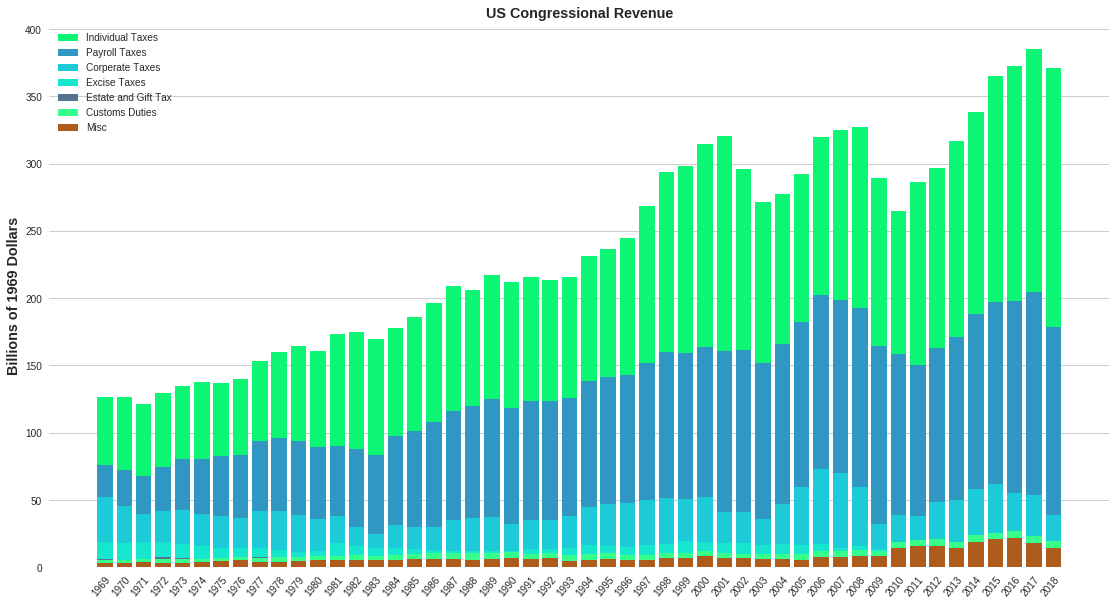

In [58]:
N = 49
Individual = (income['Individual Income Taxes'] * inflation['Dollar value vs 1969 dollars'])
Payroll = (income['Payroll Taxes'] * inflation['Dollar value vs 1969 dollars'])
Corperate = (income["Corporate Income Taxes"] * inflation['Dollar value vs 1969 dollars'])
Excise = (income["Excise Taxes"] * inflation['Dollar value vs 1969 dollars'])
Estate = (income["Estate and Gift Taxes"] * inflation['Dollar value vs 1969 dollars'])
Customs = (income["Customs Duties"] * inflation['Dollar value vs 1969 dollars'])
Misc = (income["Miscellaneous Receipts"] * inflation['Dollar value vs 1969 dollars'])

ind = np.arange(N)    # the x locations for the groups
width = 0.8      # the width of the bars: can also be len(x) sequence

p1 = plt.bar(income['Year'], Individual, width, color='#0CF574', 
             bottom=Payroll)
p2 = plt.bar(income['Year'], Payroll, width, color='#2F97C1',
             bottom=Corperate)
p3 = plt.bar(income['Year'], Corperate, width, color='#1CCAD8',
             bottom=Excise)
p4 = plt.bar(income['Year'], Excise, width, color='#15E6CD',
             bottom=Estate)
p5 = plt.bar(income['Year'], Estate, width, color='#587291',
             bottom=Customs)
p6 = plt.bar(income['Year'], Customs, width, color='#37FF8B',
             bottom=Misc)
p7 = plt.bar(income['Year'], Misc, width, color='#AD5C1D')

ax = plt.gca()
ax.grid(b=True, which='major', axis='y', color='black', alpha=.2)
ax.set_facecolor('white')
plt.ylabel('Billions of 1969 Dollars', fontweight='bold', fontsize='large')
plt.title('US Congressional Revenue', fontweight='bold', fontsize='large')
plt.xticks(income['Year'], rotation=50,horizontalalignment='right',rotation_mode='anchor')
plt.yticks(np.arange(0, 450, 50))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0]), ('Individual Taxes',
                                                               'Payroll Taxes',
                                                               'Corperate Taxes',
                                                               'Excise Taxes',
                                                               'Estate and Gift Tax',
                                                               'Customs Duties',
                                                               'Misc',
                                                            ))

plt.show()

The 9/11 attacks and the 08-09 financial crisis can be seen as two sudden falls in latter portion chart

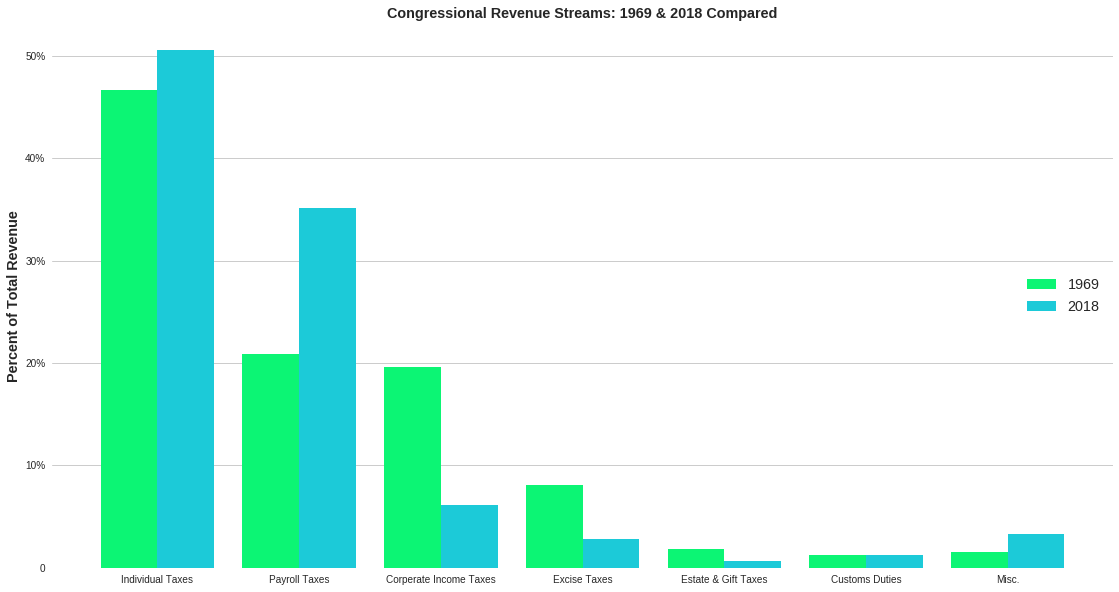

In [53]:
Individual = norm_income['Individual Income Taxes']
Payroll = norm_income['Payroll Taxes']
Corperate = norm_income["Corporate Income Taxes"]
Excise = norm_income["Excise Taxes"]
Estate = norm_income["Estate and Gift Taxes"]
Customs = norm_income["Customs Duties"] 
Misc = norm_income["Miscellaneous Receipts"]


first = (Individual[0], Payroll[0], Corperate[0], Excise[0], Estate[0], Customs[0], Misc[0])
second = (Individual[49], Payroll[49], Corperate[49], Excise[49], Estate[49], Customs[49], Misc[49])

ind = np.arange(len(first))  # the x locations for the groups
width = 0.4  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, first, width,
                color='#0CF574', label='1969')
rects2 = ax.bar(ind + width/2, second, width,
                color='#1CCAD8', label='2018')

ax = plt.gca()
ax.grid(b=True, which='major', axis='y', color='black', alpha=.2)
ax.set_facecolor('white')
ax.set_ylabel('Percent of Total Revenue', fontweight='bold', fontsize='large')
ax.set_title('Congressional Revenue Streams: 1969 & 2018 Compared', fontweight='bold', fontsize='large')
ax.set_xticks(ind)
ax.set_xticklabels(('Individual Taxes', 'Payroll Taxes', 'Corperate Income Taxes', 'Excise Taxes', 'Estate & Gift Taxes', 'Customs Duties', 'Misc.'))
ax.legend(loc=7, fontsize='large')
ax.set_yticklabels(('0', '10%', '20%', '30%', '40%', '50%'))
plt.show();

Here we can see the relative changes in which revenue streams account for what percentage of Congressional revenue in both 1969 and 2018



---



**Plot Mandatory Spending**

In [0]:
ax.grid(b=True, which='major', axis='y', color='black', alpha=.2)
ax.set_facecolor('white')
plt.ylabel('Billions of 1969 Dollars', fontweight='bold', fontsize='large')
plt.title('US Congressional Revenue', fontweight='bold', fontsize='large')
plt.xticks(income['Year'], rotation=50,horizontalalignment='right',rotation_mode='anchor')
plt.yticks(np.arange(0, 450, 50))

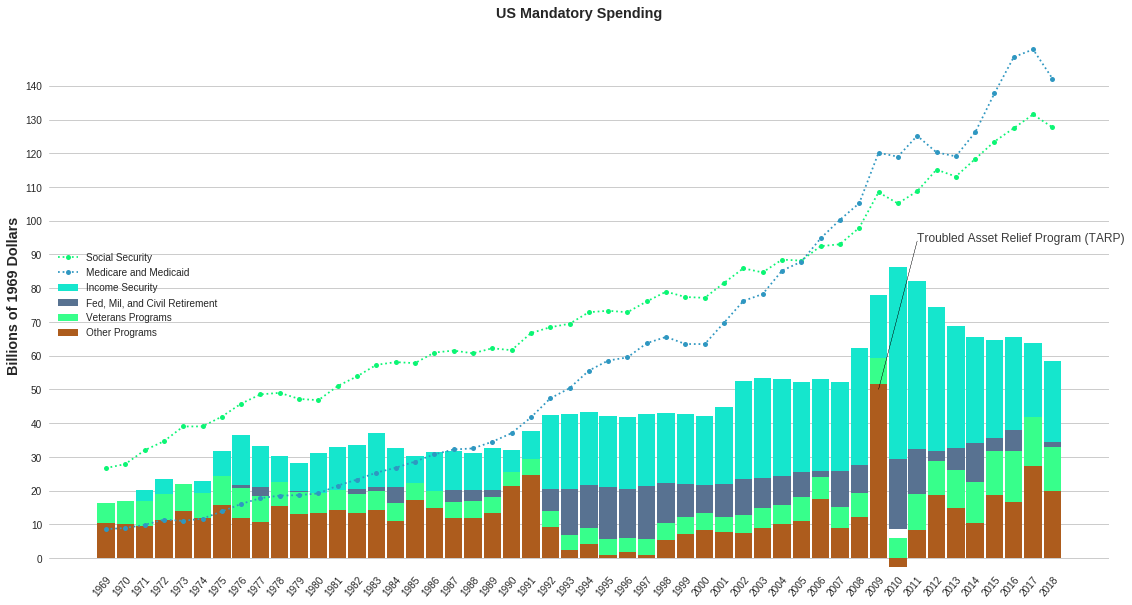

In [103]:
N = 49
Ss = (mand_spend['Social Security'] * inflation['Dollar value vs 1969 dollars'])
Medcare_and_medicaid = (mand_spend['Medicare and Medicaid'] * inflation['Dollar value vs 1969 dollars'])
IncSec = (mand_spend["Income Security"] * inflation['Dollar value vs 1969 dollars'])
ret = (mand_spend["Federal Civilian and Military Retirement"] * inflation['Dollar value vs 1969 dollars'])
vet = (mand_spend["Veterans' Programs"] * inflation['Dollar value vs 1969 dollars'])
oth = (mand_spend["Other Programs Total"] * inflation['Dollar value vs 1969 dollars'])

ind = np.arange(N)    # the x locations for the groups
width = 0.9   # the width of the bars: can also be len(x) sequence

p1 = plt.plot(income['Year'], Ss, color='#0CF574', label='Social Security',
              linestyle=':', marker='o', markersize=5)

p2 = plt.plot(income['Year'], Medcare_and_medicaid, color='#2F97C1', label='Medicare and Medicaid',
              linestyle=':', marker='o', markersize=5)

p3 = plt.bar(income['Year'], IncSec, width, color='#15E6CD',
             bottom=ret, label = 'Income Security')

p4 = plt.bar(income['Year'], ret, width, color='#587291',
             bottom=vet, label='Fed, Mil, and Civil Retirement')

p5 = plt.bar(income['Year'], vet, width, color='#37FF8B',
             bottom=oth, label='Veterans Programs')

p6 = plt.bar(income['Year'], oth, width, color='#AD5C1D', label = 'Other Programs',
            bottom=0)


plt.text(2011, 94, s='Troubled Asset Relief Program (TARP)', alpha=.9)
plt.arrow(2011, 94, -2, -44, alpha=.8)
ax = plt.gca()
ax.grid(b=True, which='major', axis='y', color='black', alpha=.2)
ax.set_facecolor('white')
plt.ylabel('Billions of 1969 Dollars', fontweight='bold', fontsize='large')
plt.title('US Mandatory Spending', fontweight='bold', fontsize='large')
plt.xticks(income['Year'], rotation=50,horizontalalignment='right',rotation_mode='anchor')
plt.yticks(np.arange(0, 150, 10))
plt.legend(loc=6)

plt.show()

The large spike in 'Other Programs' in 2009 is the Troubled Asset Relief Program.
Post crisis unemployment hit its highest point in 2010. This can be seen as a spike in 'Income Security' spending.
Medicare and Medicaid spending eclipsed spcial security spending for the first time in 2005



---



**Plot Discretionary Spending**

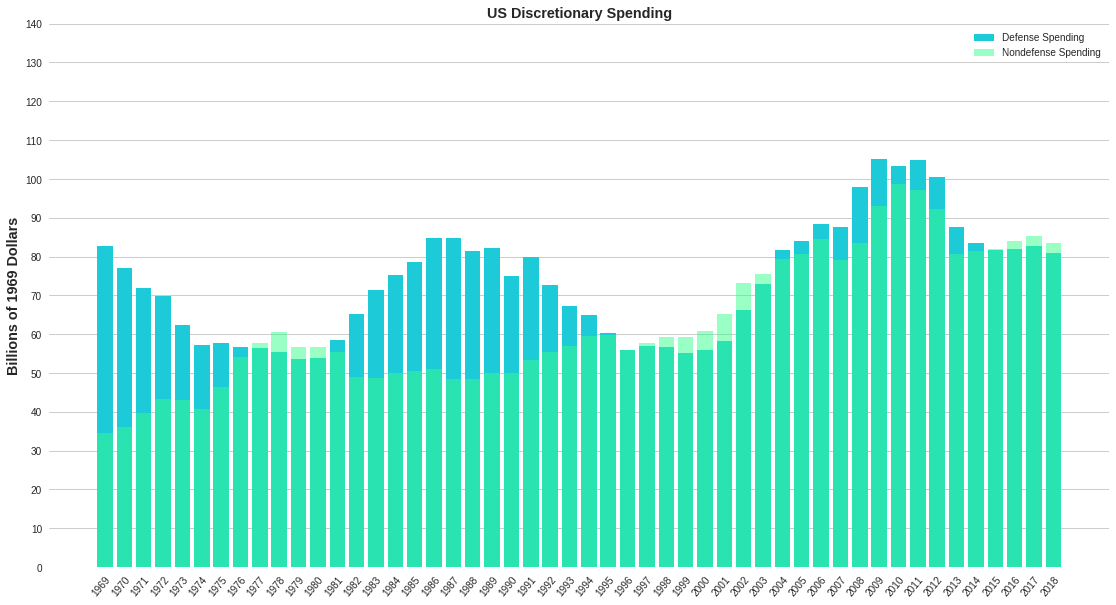

In [102]:
N = 49
Defense = (dis_spend['Defense'] * inflation['Dollar value vs 1969 dollars'])
Nondefense = (dis_spend['Nondefense'] * inflation['Dollar value vs 1969 dollars'])


ind = np.arange(N)    # the x locations for the groups
width = 0.8      # the width of the bars: can also be len(x) sequence

p1 = plt.bar(dis_spend['Year'], Defense, width, color='#1CCAD8')

p2 = plt.bar(dis_spend['Year'], Nondefense, width, alpha=.5, color ='#37FF8B')

plt.xticks(income['Year'], rotation=50,horizontalalignment='right',rotation_mode='anchor')
plt.yticks(np.arange(0, 150, 10))
plt.legend((p1[0], p2[0]), ('Defense Spending',
                             'Nondefense Spending',
                          ))

ax = plt.gca()
ax.grid(b=True, which='major', axis='y', color='black', alpha=.2)
ax.set_facecolor('white')
plt.ylabel('Billions of 1969 Dollars', fontweight='bold', fontsize='large')
plt.title('US Discretionary Spending', fontweight='bold', fontsize='large')

plt.show()
plt.show()

At the begining of the chart we can see the effects of the deescliation in vietnam, the second blue hill represents the Reagan era military buildup 



---



**Plot Mand vs Disc Spending**

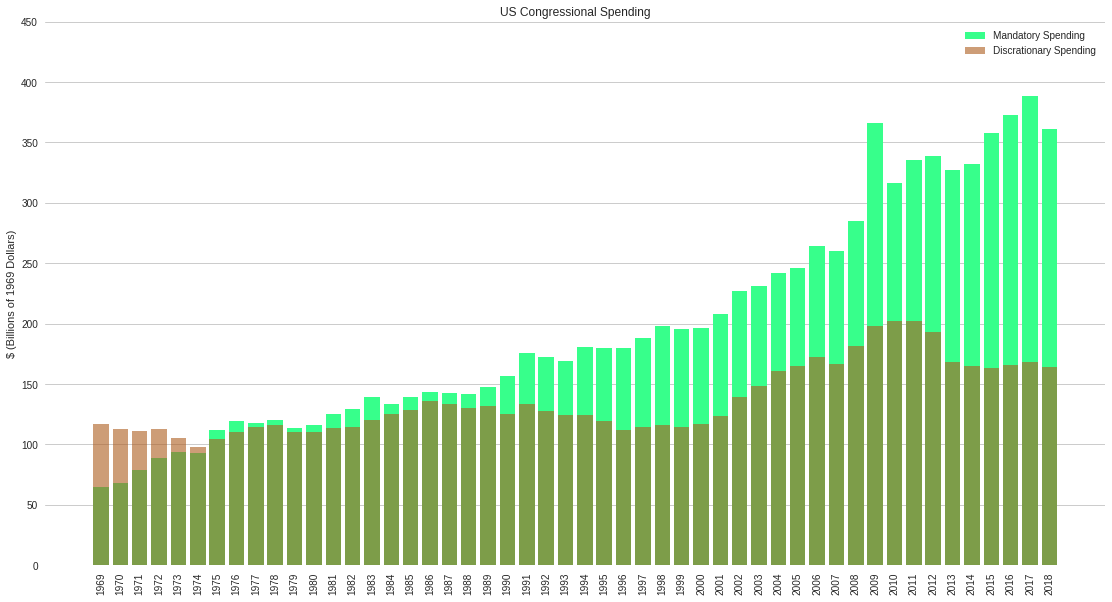

In [106]:
N = 49
mand = (mand_spend['Total'] * inflation['Dollar value vs 1969 dollars'])
dis = (dis_spend['Total Discretionary'].astype(float) * inflation['Dollar value vs 1969 dollars'].astype(float))

ind = np.arange(N)    # the x locations for the groups
width = 0.8      # the width of the bars: can also be len(x) sequence

p1 = plt.bar(income['Year'], mand, width, color='#37FF8B')

p2 = plt.bar(income['Year'], dis, width, alpha=.6, color ='#AD5C1D')

plt.ylabel('$ (Billions of 1969 Dollars)')
plt.title('US Congressional Spending')
plt.xticks(income['Year'], rotation=90)
plt.yticks(np.arange(0, 500, 50))
plt.legend((p1[0], p2[0]), ('Mandatory Spending',
                             'Discrationary Spending',
                          ))
ax = plt.gca()
ax.grid(b=True, which='major', axis='y', color='black', alpha=.2)
ax.set_facecolor('white')
plt.show()

Here we can see tha aggressive rise in Mandatory spending as opposed to discresionary

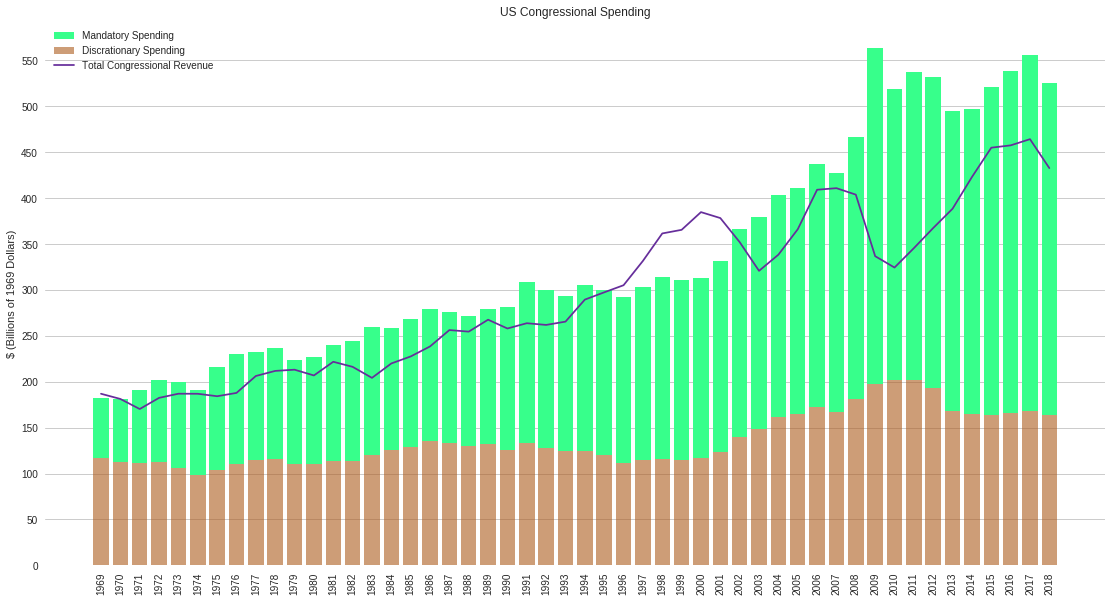

In [107]:
N = 49
mand = (mand_spend['Total'] * inflation['Dollar value vs 1969 dollars'])
dis = (dis_spend['Total Discretionary'].astype(float) * inflation['Dollar value vs 1969 dollars'].astype(float))
rev = income['Total Revenue'] * inflation['Dollar value vs 1969 dollars']

ind = np.arange(N)    # the x locations for the groups
width = 0.8      # the width of the bars: can also be len(x) sequence

p1 = plt.bar(income['Year'], mand, width, color='#37FF8B'
             ,bottom=dis)

p2 = plt.bar(income['Year'], dis, width, alpha=.6, color ='#AD5C1D')

p3 = plt.plot(income['Year'], rev, color='#662E9B')

plt.ylabel('$ (Billions of 1969 Dollars)')
plt.title('US Congressional Spending')
plt.xticks(income['Year'], rotation=90)
plt.yticks(np.arange(0, 600, 50))
plt.legend((p1[0], p2[0], p3[0]), ('Mandatory Spending',
                             'Discrationary Spending',
                                   'Total Congressional Revenue'
                          ))
ax = plt.gca()
ax.grid(b=True, which='major', axis='y', color='black', alpha=.2)
ax.set_facecolor('white')
plt.show()

when the stacked bars of mandatory spending rise above the purple line representing congressional revenue this constitutes a budget deficit

**Congressional Budget Surplus/Deficit**

In [0]:
Surplus = []
Deficit = []
income_ = income['Total Revenue'] * inflation['Dollar value vs 1969 dollars']
total_mand = mand_spend['Total'] * inflation['Dollar value vs 1969 dollars']
total_dis = dis_spend['Total Discretionary'] * inflation['Dollar value vs 1969 dollars']
difference = income_ - (total_mand + total_dis)

for i in (difference):
  if i >=0:
    Surplus.append(i)
  else:
    Surplus.append(0)
    
    
for i in (difference):
  if i < 0:
    Deficit.append(i)
  else:
    Deficit.append(0)

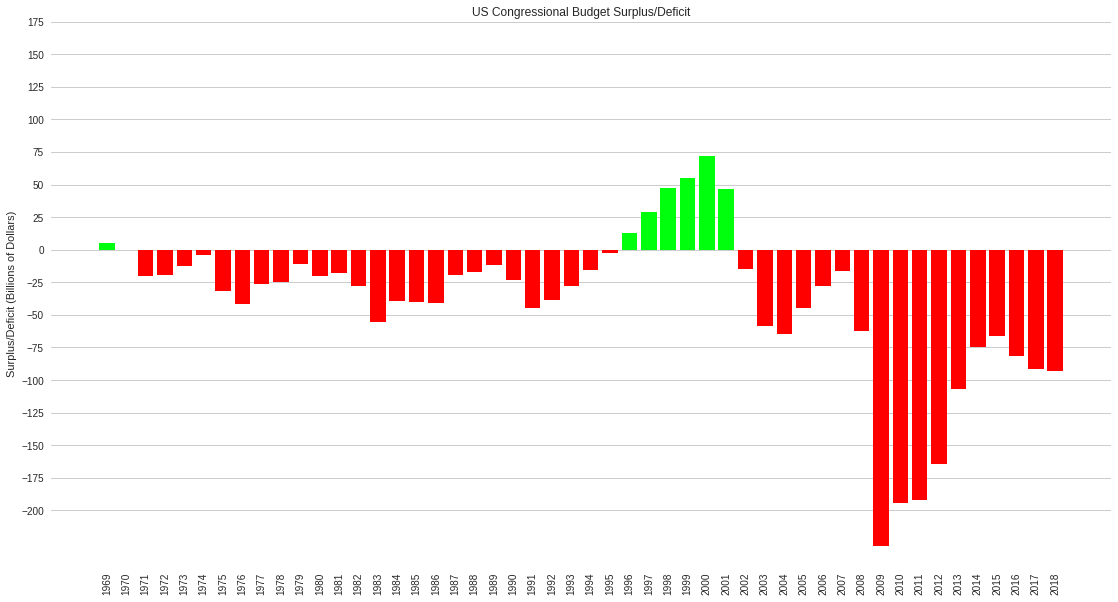

In [108]:
# 49 is the number of years I have 
N = 49

# the x locations for the groups
ind = np.arange(N)
# the width of the bars: can also be len(x) sequence
width = 0.8      

# Bars for surplus
p1 = plt.bar(income['Year'], Surplus, width, color='#00FF0D')

# Bars for deficit
p2 = plt.bar(income['Year'], Deficit, width, color ='#FF0000')

plt.ylabel('Surplus/Deficit (Billions of Dollars)')
plt.title('US Congressional Budget Surplus/Deficit')
plt.xticks(income['Year'], rotation=90)
plt.yticks(np.arange(-200, 200, 25))

ax = plt.gca()
ax.grid(b=True, which='major', axis='y', color='black', alpha=.2)
ax.set_facecolor('white')
plt.show()

Here we can see the deficit vs surplus years with the large deficit twards th end representing the extra mandatory spending caused by the financial crisis 

In [32]:
norm_income.head(1) / 3.1418

,Year,Individual Income Taxes,Payroll Taxes,Corporate Income Taxes,Excise Taxes,Estate and Gift Taxes,Customs Duties,Miscellaneous Receipts,Total Revenue
0,626.710803,0.148501,0.066417,0.0625,0.025885,0.00596,0.003917,0.004939,59.488191


In [33]:
norm_income.tail(1) / 3.1418

,Year,Individual Income Taxes,Payroll Taxes,Corporate Income Taxes,Excise Taxes,Estate and Gift Taxes,Customs Duties,Miscellaneous Receipts,Total Revenue
49,642.306958,0.160976,0.111942,0.019573,0.009084,0.002199,0.003949,0.010566,1059.488191


In [34]:
normalized_mand_spending.head(1) / 3.1418

,Year,Social Security,Medicare and Medicaid,Income Security,Federal Civilian and Military Retirement,Veterans' Programs,Other Programs Total,Total
0,626.710803,0.131492,0.042304,0.032011,0.031519,0.030386,0.050578,20.57101


In [35]:
normalized_mand_spending.tail(1) / 3.1418

,Year,Social Security,Medicare and Medicaid,Income Security,Federal Civilian and Military Retirement,Veterans' Programs,Other Programs Total,Total
49,642.306958,0.112512,0.125256,0.032683,0.018684,0.011606,0.017548,884.429308


In [36]:
normalized_dis_spending.head(1) / 3.1418

,Year,Defense,Nondefense,Total Discretionary
0,626.710803,0.224403,0.093886,37.335286


In [37]:
normalized_dis_spending.tail(1) / 3.1418

,Year,Defense,Nondefense,Total Discretionary
49,642.306958,0.156625,0.161664,402.12617


In [38]:
print((dis_spend['Total Discretionary'][0] / income['Total Revenue'][0]) / 3.1418,
(mand_spend['Total'][0] / income['Total Revenue'][0]) / 3.1418,
income['Total Revenue'][0])

0.19976075711677074 0.11006426029375015 186.9


In [39]:
print((dis_spend['Total Discretionary'][49] / income['Total Revenue'][49]) / 3.1418,
(mand_spend['Total'][49] / income['Total Revenue'][49]) / 3.1418,
income['Total Revenue'][49])

0.12080577093508887 0.26569811278876954 3328.7




---



# Data Aggrigation

**Merge the dataframes**



---



**Describe the dataframe**



---

